# Fit a Decision Tree Model using Scikit-Learn for wine dataset

The wine dataset is one of the datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Q1. Build a Decision Tree Classifier model with max_depth = 5, random_state=100 for wine dataset


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create Decision Tree Classifier with max_depth=5
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=100)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7777777777777778


## Q2. Visualize the constructed Decision Trees using Matplotlib

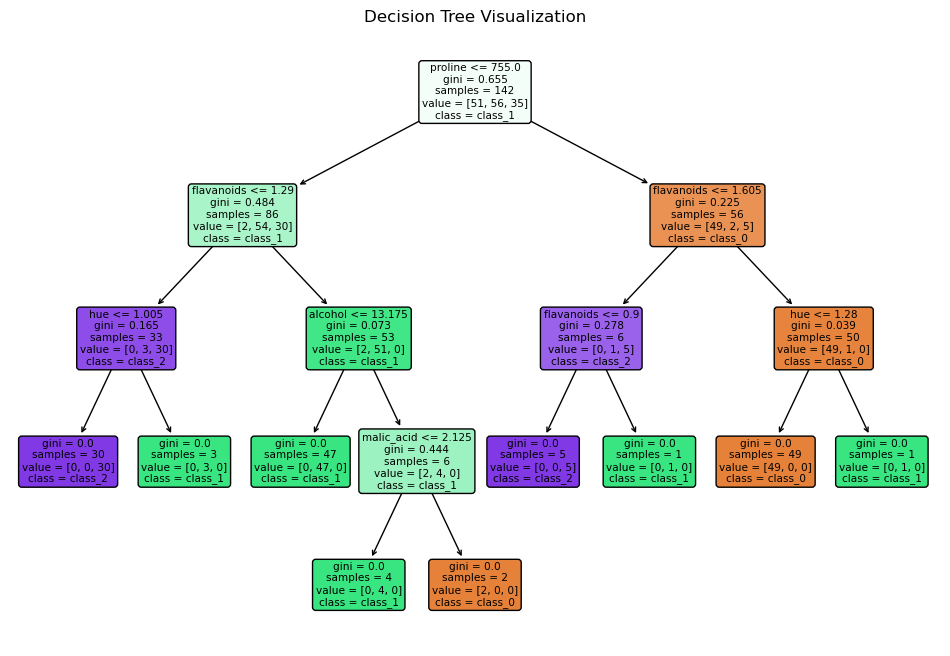

In [4]:
# Convert class names array to a list
class_names_list = wine.target_names.tolist()

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=wine.feature_names, class_names=class_names_list, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


## Q3. Report the Confusion Matrix of the constructed Decison Tree

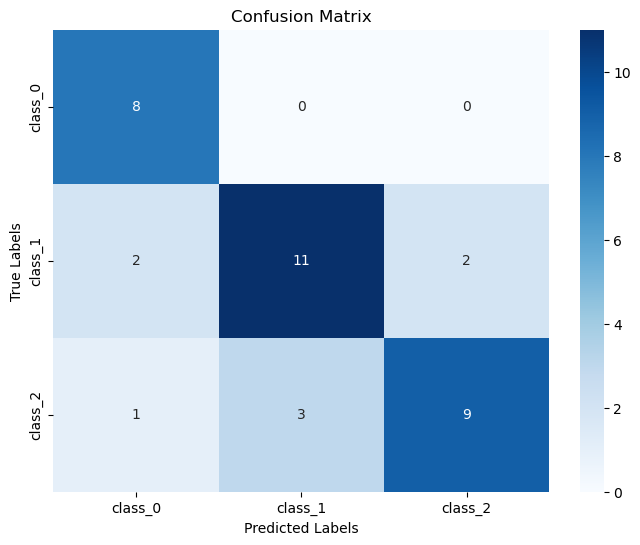

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
